In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df=pd.read_csv("FINAL_DATASET.csv")

In [4]:
df.head()

,date,product_id,product_name,category,branch_id,branch_name,order_id,price,promotion_flag,festival_flag,...,offline_sales,returns_count,cpi,day_of_week,month,lag_1,lag_7,lag_30,rolling_mean_7,rolling_mean_30
0,2021-01-31,P001,Men_Tshirt,Male,B001,Bangalore,31,58.70,0,1,...,31.97,4.35,150.00,6,1,115.12,130.14,121.02,106.288571,105.737667
1,2021-02-01,P001,Men_Tshirt,Male,B001,Bangalore,32,58.01,0,0,...,20.86,2.64,150.64,0,2,131.32,125.05,112.25,100.662857,104.851667
2,2021-02-02,P001,Men_Tshirt,Male,B001,Bangalore,33,55.17,0,0,...,22.61,3.39,150.64,1,2,85.67,93.74,155.90,100.540000,102.751000
3,2021-02-03,P001,Men_Tshirt,Male,B001,Bangalore,34,58.21,0,0,...,20.74,4.20,150.64,2,2,92.88,93.47,75.15,99.354286,103.085000
4,2021-02-04,P001,Men_Tshirt,Male,B001,Bangalore,35,57.15,0,0,...,24.67,3.43,150.64,3,2,85.17,89.29,91.68,101.071429,103.406000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3520 entries, 0 to 3519
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             3520 non-null   object 
 1   product_id       3520 non-null   object 
 2   product_name     3520 non-null   object 
 3   category         3520 non-null   object 
 4   branch_id        3520 non-null   object 
 5   branch_name      3520 non-null   object 
 6   order_id         3520 non-null   int64  
 7   price            3520 non-null   float64
 8   promotion_flag   3520 non-null   int64  
 9   festival_flag    3520 non-null   int64  
 10  holiday_flag     3520 non-null   int64  
 11  seasonal_index   3520 non-null   float64
 12  total_sales      3520 non-null   float64
 13  online_sales     3520 non-null   float64
 14  offline_sales    3520 non-null   float64
 15  returns_count    3520 non-null   float64
 16  cpi              3520 non-null   float64
 17  day_of_week   

In [9]:
categorical = (df.dtypes == 'object')
categorical_columns = list(categorical[categorical].index)
print("Categorical variables:", len(categorical_columns))

integer = (df.dtypes == 'int')
integer_columns = list(integer[integer].index)
print("Integer variables:", len(integer_columns))

floating = (df.dtypes == 'float')
floating_columns = list(floating[floating].index)
print("Float variables:", len(floating_columns))

Categorical variables: 6
Integer variables: 6
Float variables: 12


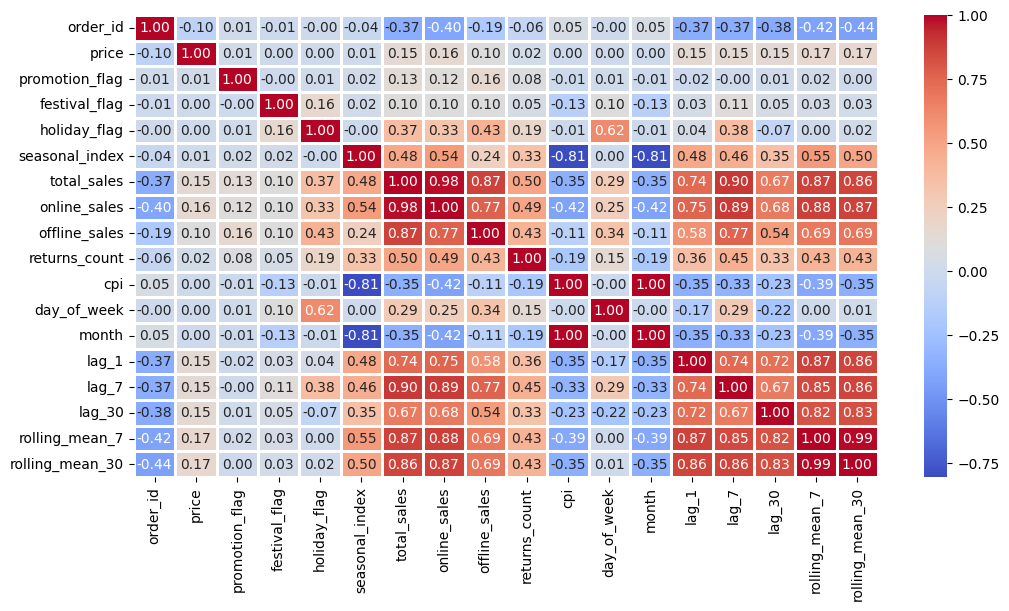

In [10]:
n = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(n.corr(), cmap='coolwarm', fmt='.2f', linewidths=2, annot=True)
plt.show()

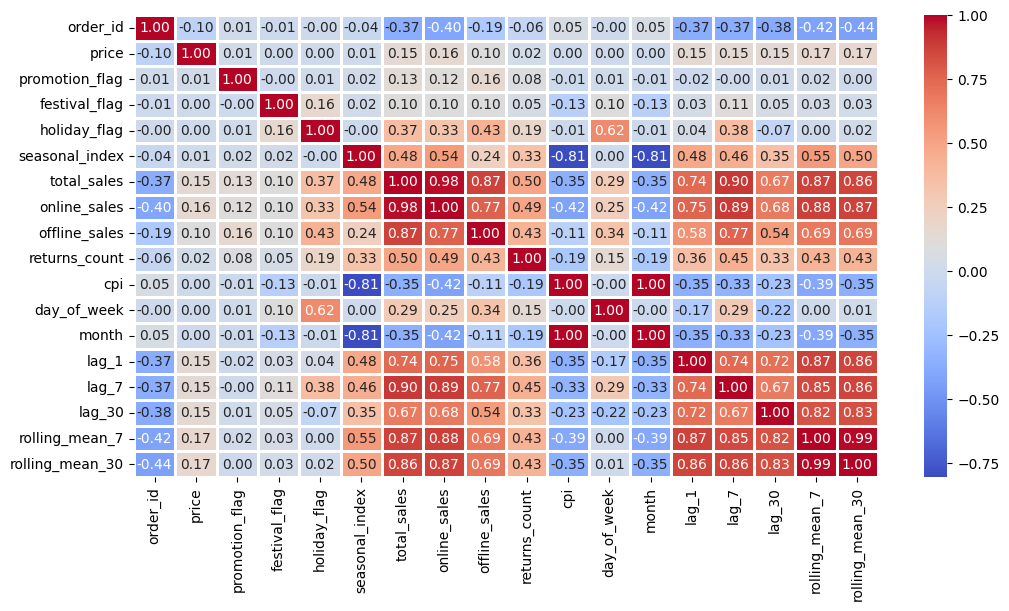

In [11]:
n = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(n.corr(), cmap='coolwarm', fmt='.2f', linewidths=2, annot=True)
plt.show()

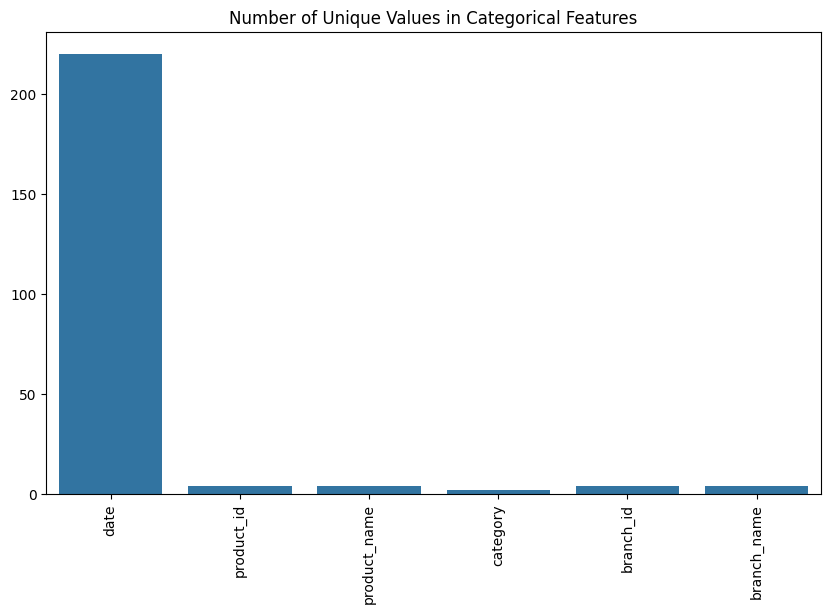

In [12]:
unique_values = []
for c in categorical_columns:
    unique_values.append(df[c].nunique())

plt.figure(figsize=(10,6))
plt.title('Number of Unique Values in Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=categorical_columns, y=unique_values)
plt.show()

In [13]:
categorical = (df.dtypes == 'object')
categorical_columns = list(categorical[categorical].index)
print("Categorical variables:", len(categorical_columns))

integer = (df.dtypes == 'int')
integer_columns = list(integer[integer].index)
print("Integer variables:", len(integer_columns))

floating = (df.dtypes == 'float')
floating_columns = list(floating[floating].index)
print("Float variables:", len(floating_columns))

Categorical variables: 6
Integer variables: 6
Float variables: 12


In [14]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns:', cat_col)
print('Numerical columns:', num_col)

Categorical columns: ['date', 'product_id', 'product_name', 'category', 'branch_id', 'branch_name']
Numerical columns: ['order_id', 'price', 'promotion_flag', 'festival_flag', 'holiday_flag', 'seasonal_index', 'total_sales', 'online_sales', 'offline_sales', 'returns_count', 'cpi', 'day_of_week', 'month', 'lag_1', 'lag_7', 'lag_30', 'rolling_mean_7', 'rolling_mean_30']


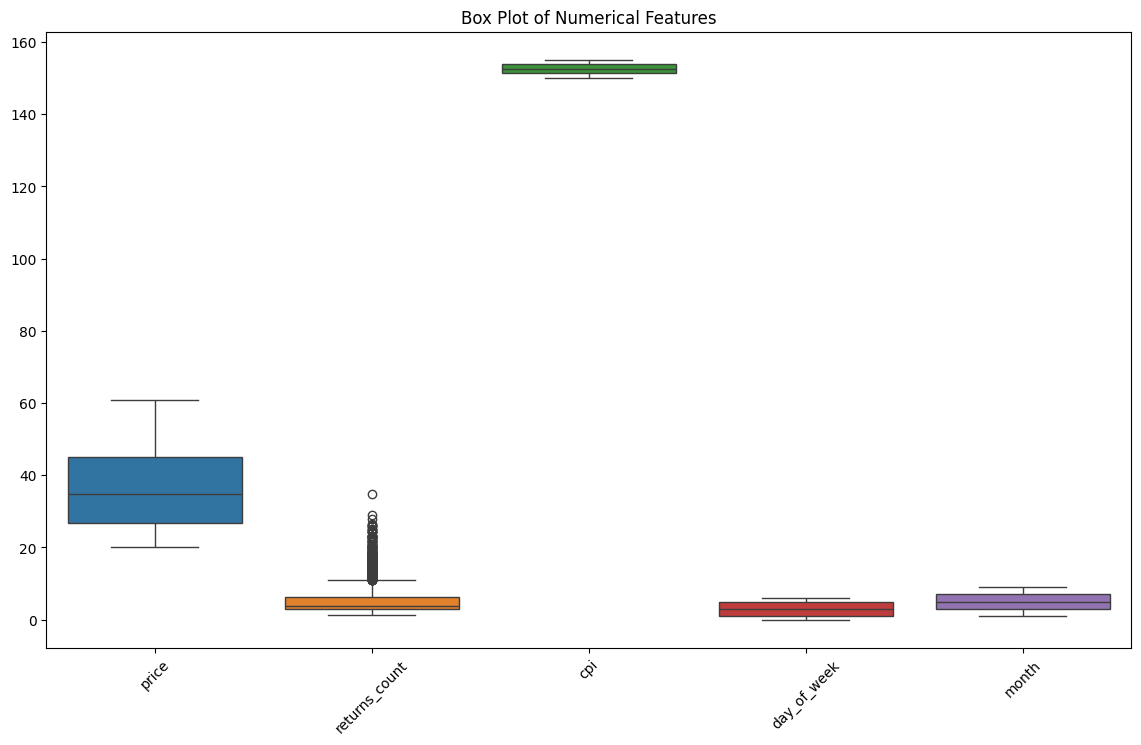

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = [
    'price', 'returns_count', 'cpi', 'day_of_week', 'month'
]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features")
plt.show()


In [21]:
import pandas as pd

numerical_cols = [
    'price', 'returns_count', 'cpi', 'day_of_week', 'month'
]

outlier_counts = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count values outside bounds
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_counts[col] = len(outliers)

outlier_counts


{'price': 0, 'returns_count': 431, 'cpi': 0, 'day_of_week': 0, 'month': 0}

In [24]:
# convert
df['date'] = pd.to_datetime(df['date'], errors='coerce')   # coerce to find parsing issues

# check for any parsing failures
df[df['date'].isna()]

# set index if you prefer working with time index (optional)
df = df.sort_values('date')
df = df.reset_index(drop=True)

# create time-related features (if not already)
df['year'] = df['date'].dt.year
df['month_name'] = df['date'].dt.month_name()
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week_name'] = df['date'].dt.day_name()
df['weekofyear'] = df['date'].dt.isocalendar().week


In [25]:
# missing values summary
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

# duplicates
dupes = df.duplicated()
dupes.sum()
df[dupes].head()


,date,product_id,product_name,category,branch_id,branch_name,order_id,price,promotion_flag,festival_flag,holiday_flag,seasonal_index,total_sales,online_sales,offline_sales,returns_count,cpi,day_of_week,month,lag_1,lag_7,lag_30,rolling_mean_7,rolling_mean_30,year,month_name,day,day_of_week_name,weekofyear


In [26]:
# check object columns and unique counts (categorical cardinality)
for col in ['product_id','product_name','category','branch_id','branch_name']:
    print(col, "unique:", df[col].nunique())

# convert low-cardinality object columns to category to save memory (optional)
for col in ['category','branch_id','branch_name','product_id']:
    if df[col].nunique() < 500:   # threshold tweakable
        df[col] = df[col].astype('category')


product_id unique: 4
product_name unique: 4
category unique: 2
branch_id unique: 4
branch_name unique: 4


In [28]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.weekday
df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)


In [29]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['product_name', 'category', 'branch_name']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [30]:
df = pd.get_dummies(df, columns=['category', 'branch_name'], drop_first=True)


In [31]:
!pip install category_encoders
from category_encoders import TargetEncoder

te = TargetEncoder(cols=['product_name'])
df['product_name_encoded'] = te.fit_transform(df['product_name'], df['total_sales'])
df.drop(columns=['product_name'], inplace=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 9.6 MB/s eta 0:00:00


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3520 entries, 0 to 3519
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  3520 non-null   datetime64[ns]
 1   product_id            3520 non-null   int64         
 2   branch_id             3520 non-null   category      
 3   order_id              3520 non-null   int64         
 4   price                 3520 non-null   float64       
 5   promotion_flag        3520 non-null   int64         
 6   festival_flag         3520 non-null   int64         
 7   holiday_flag          3520 non-null   int64         
 8   seasonal_index        3520 non-null   float64       
 9   total_sales           3520 non-null   float64       
 10  online_sales          3520 non-null   float64       
 11  offline_sales         3520 non-null   float64       
 12  returns_count         3520 non-null   float64       
 13  cpi               

In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Convert date
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.weekday
df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)

# 2. Label Encode high-cardinality columns
label_cols = ['product_id']
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# 3. One-Hot Encode low-cardinality columns
df = pd.get_dummies(df, columns=['category', 'branch_name'], drop_first=True)

# 4. Drop the original date column if using extracted features
# df.drop(columns=['date'], inplace=True)


KeyError: "None of [Index(['category', 'branch_name'], dtype='object')] are in the [columns]"